## Score: 101

## Comment: 

<font color=Red>
Q1.[11] Good job!
<br><br>
Q2.[10] Correct
<br><br>
Q3.[15+5] Correct
<br><br>
Q4.[5+15+5] Correct
<br><br>
Q5.[5+25+5] Correct
</font>


In [30]:
#1. Flowchart
def values(a,b,c):
    # 第一层判断：a > b
    if a>b:
        # 第二层判断：b > c
        if b>c:
            lis=[a,b,c]
        else:
            # 如果 a>b 但 b<=c，进一步判断 a > c
            if a>c:
                lis=[a,c,b]
            else:
                lis=[c,a,b]
    else:
        # 如果 a<b，进一步判断 b > c
        if b>c:
            print(f"input: a={a}, b={b}, c={c}  无输出值")
            return  # 直接结束
        else:
            lis = [c, b, a]

    # 从列表中提取 x, y, z
    x, y, z = lis

    # 计算并输出结果
    result = x + y - 10 * z
    print(f"input: a={a}, b={b}, c={c}")
    print(f"[x,y,z]: {lis}")
    print(f"out: {x} + {y} - 10*{z} = {result}")

    return result

# #随机数试验
# import random
# a = random.randint(1, 100)
# b = random.randint(1, 100)
# c = random.randint(1, 100)
# values(a, b, c)
#当a=5，b=15，c=10时
a,b,c=5,15,10
values(a, b, c)

input: a=5, b=15, c=10  无输出值


In [31]:
import math

def F(x):
    # F(1)=1
    if x == 1:
        return 1

    # 递归计算：
    return F(math.ceil(x/3))+2*x

test_list=[1,3,5,7,9]
# 计算每个元素的F(x)
for num in test_list:
    result = F(num)
    print(f"F({num}) = F(ceil({num}/3)) + 2*{num} = {result}")


F(1) = F(ceil(1/3)) + 2*1 = 1
F(3) = F(ceil(3/3)) + 2*3 = 7
F(5) = F(ceil(5/3)) + 2*5 = 15
F(7) = F(ceil(7/3)) + 2*7 = 21
F(9) = F(ceil(9/3)) + 2*9 = 25


In [11]:
def Find_number_of_ways(x):
    dice=10  #10个骰子
    faces=6  #每个骰子有6个面

    # 开始时，没有掷骰子，点数和为0的方法有 1 种
    ways={0:1}

    # 加一个骰子，更新所有可能的和(骰子10)
    for i in range(dice):
        new_ways={}
        for current_sum, count in ways.items():
            # 当前已有的和加上一个新骰子(面6)
            for face in range(1, faces + 1):
                new_sum=current_sum+face
                new_ways[new_sum]=new_ways.get(new_sum, 0)+count
        ways=new_ways  # 更新为新的结果

    # 返回点数和为x的方法数
    return ways.get(x, 0)

# 计算从10到60每个和的可能情况数
Number_of_ways = []
for j in range(10, 61):
    Number_of_ways.append(Find_number_of_ways(j))

# 找出最多的方法数对应的点数和
max_ways = max(Number_of_ways)
best_x = 10 +Number_of_ways.index(max_ways)

print("Number_of_ways =", Number_of_ways)
print(f"点数和为 {best_x} 的时候方法最多，共 {max_ways} 种。")


Number_of_ways = [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
点数和为 35 的时候方法最多，共 4395456 种。


已完成 N=20, 当前总和平均值: 6029306.25
已完成 N=40, 当前总和平均值: 5525045929569.38
已完成 N=60, 当前总和平均值: 5495592505292637184.00
已完成 N=80, 当前总和平均值: 5742397643169487506112512.00
已完成 N=100, 当前总和平均值: 6224164447120605415592890990592.00


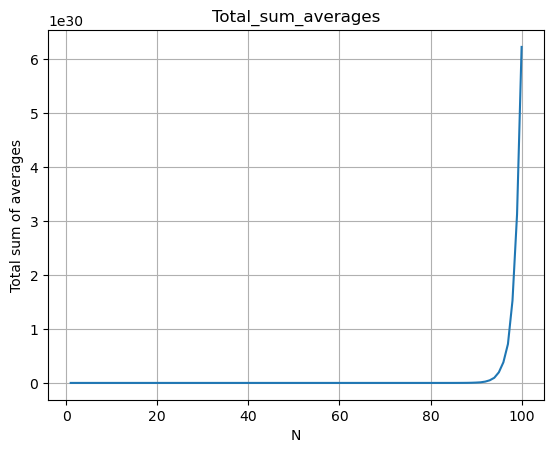

In [35]:
import random

def Random_integer(N):
    return [random.randint(0,10) for i in range(N)]

def Sum_averages(arr):
    n=len(arr)
    dp=[0.0] * (n+1)       #包含n+1个0.0的列表，用于计算所有大小为k的子集的元素总和,后续运算自动保持浮点精度
    count=[0] * (n+1)
    count[0]=1
    dp[0]=0

    for x in arr:
        for k in range(n, 0, -1):  #逆序更新，保证用到的dp[k-1]仍然是上一个状态的值
            dp[k] += dp[k-1] + x * count[k-1]
            count[k] += count[k-1]

    #计算每个子集大小的平均值和
    total = 0
    for k in range(1, n+1):
        total += dp[k] / k
    return total

import matplotlib.pyplot as plt
Total_sum_averages = []

for N in range(1, 101):
    arr=Random_integer(N)
    result=Sum_averages(arr)
    Total_sum_averages.append(result)

    #每20个输出一次进度
    if N % 20 ==0:
        print(f"已完成 N={N}, 当前总和平均值: {result:.2f}")

plt.plot(range(1, 101), Total_sum_averages)
plt.xlabel("N")
plt.ylabel("Total sum of averages")
plt.title("Total_sum_averages")
plt.grid(True)
plt.show()

In [51]:
import random

# 5-1 创建矩阵
def create_matrix(N, M):
    matrix = [[random.randint(0, 1) for j in range(M)] for i in range(N)]
    matrix[0][0] = 1  # 左上角固定为1
    matrix[N-1][M-1] = 1  # 右下角固定为1
    return matrix

# 5-2 计算路径数
def Count_path(matrix):
    N=len(matrix)
    M=len(matrix[0])

    # 创建DP表
    dp=[[0] * M for i in range(N)]
    dp[0][0]=1 if matrix[0][0]==1 else 0

    # 填充DP表
    for i in range(N):
        for j in range(M):
            if matrix[i][j] == 0:  # 阻塞单元格
                dp[i][j]=0
                continue
            if i > 0:
                dp[i][j] += dp[i-1][j]  # 从上方来
            if j > 0:
                dp[i][j] += dp[i][j-1]  # 从左方来

    return dp[N-1][M-1]

N, M = 10, 8
matrix = create_matrix(N, M)
print("完整矩阵:")
for i in range(N):
    print(f"  第{i+1}行: {matrix[i]}")

print("===1000次运行统计 ===")
total_paths=0
runs=1000

for run in range(runs):
    matrix=create_matrix(N, M)
    paths=Count_path(matrix)
    total_paths += paths

mean_paths = total_paths/runs
print(f"运行次数: {runs}")
print(f"总路径数: {total_paths}")
print(f"平均路径数: {mean_paths:.4f}")

完整矩阵:
  第1行: [1, 1, 0, 1, 0, 0, 0, 0]
  第2行: [0, 0, 1, 1, 1, 0, 1, 1]
  第3行: [0, 0, 1, 0, 0, 1, 1, 0]
  第4行: [0, 1, 1, 1, 0, 1, 0, 0]
  第5行: [0, 0, 0, 1, 0, 0, 1, 1]
  第6行: [0, 1, 1, 1, 0, 0, 1, 1]
  第7行: [0, 0, 0, 1, 0, 1, 0, 1]
  第8行: [0, 0, 1, 0, 0, 1, 0, 1]
  第9行: [1, 0, 0, 0, 1, 1, 1, 0]
  第10行: [0, 0, 0, 0, 0, 1, 1, 1]
===1000次运行统计 ===
运行次数: 1000
总路径数: 445
平均路径数: 0.4450
